<a href="https://colab.research.google.com/github/Tamara-CV/CLASE_IAyRN/blob/main/AF5_Procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ACTIVIDAD 5: Procesamiento de conjuntos de datos en Python
# Nombre - Matrícula: Tamara Cortes Vázquez-2055529, Alfredo Tovar Tapia-2077567,
# Ernesto Martínez Caballero-2110975, José Emiliano Martínez González-2043370,
# David Peralta Reyes-1993816
# Ejercicio 1.- Análisis y normalización de datos de sensores en un robot móvil.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 1. Cargar el datasheet con pandas
url = "https://raw.githubusercontent.com/dilp90/InteligenciaArtificial_y_RedesNeuronales_UANL_FIME/main/MachineLearning/Datasets/robot_sensors.csv"
df = pd.read_csv(url)

In [ ]:
# 2. Mostrar primeras filas del datasheet
print('Primeras 5 filas del datasheet:')
display(df.head(5))
print("\nInformación del datasheet:")
df.info()

Primeras 5 filas del datasheet:


,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0,43.708611,9.256646,23.925585
1,1,95.564288,27.095047,23.704682
2,2,75.879455,43.647292,33.593819
3,3,63.879264,36.611244,23.743193
4,4,24.041678,40.328057,24.079246



Información del datasheet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        1000 non-null   int64  
 1   Distancia (cm)    970 non-null    float64
 2   Velocidad (cm/s)  970 non-null    float64
 3   Temperatura (°C)  970 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 3. Limpiar los datos
# a. Eliminar filas con valores nulos
# b. Filtrar valores atípicos (por ejemplo, si la velocidad es negativa)
print(df.shape)
print(df.isnull().sum())
df_clean = df.dropna()
print(f"\nSe eliminaron {len(df) - len(df_clean)} filas con valores nulos.")
df_clean = df_clean[df_clean['Velocidad (cm/s)'] >= 0]
df_clean = df_clean[df_clean['Distancia (cm)'] >= 0]  # Distancia no negativa
df_clean = df_clean[df_clean['Distancia (cm)'] <= 500]  # Distancia máxima 500 cm
df_clean = df_clean[df_clean['Temperatura (°C)'].between(-20, 60)]

(1000, 4)
Tiempo (s)           0
Distancia (cm)      30
Velocidad (cm/s)    30
Temperatura (°C)    30
dtype: int64

Se eliminaron 87 filas con valores nulos.


In [ ]:
# 4. Normalizar los datos numéricos con Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
numeric_cols = ['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']
scaler = MinMaxScaler()
df_normalized = df_clean.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])
print("\nPrimeras 5 filas de los datos normalizados:")
display(df_normalized.head())


Primeras 5 filas de los datos normalizados:


,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0,0.371735,0.182609,0.262269
1,1,0.950755,0.540740,0.247509
2,2,0.730954,0.873049,0.908233
3,3,0.596960,0.731791,0.250082
4,4,0.152134,0.806411,0.272535


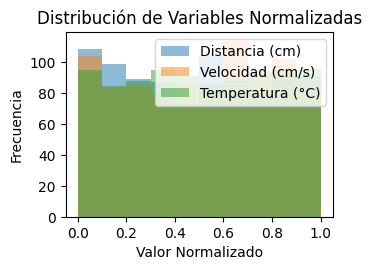

In [ ]:
# 5. Visualizar los datos normalizados usando matplotlib
plt.subplot(2, 2, 4)
for col in numeric_cols:
    plt.hist(df_normalized[col], alpha=0.5, label=col)
plt.title('Distribución de Variables Normalizadas')
plt.xlabel('Valor Normalizado')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

Ejercicio 2.- Preguntas.
Responder las siguientes preguntas:
1. ¿Cómo afecta la limpieza de datos al análisis del dataset?
R= La limpieza de datos es fundamental porque nos permite trabajar con información confiable y consistente. Si un datasheet contiene valores nulos, duplicados o atípicos, los resultados del análisis pueden ser incorrectos o engañosos. Al eliminar registros con errores (como velocidades negativas), se obtiene un conjunto de datos más representativo de la realidad.

2. ¿Por qué es importante la normalización en Machine Learning?
R= Es importante porque muchos algoritmos en Machine Lerning funcionan mejor cuando las variables numéricas están en una misma escala.

3. ¿Cómo interpretarías los datos visualizados?
R= Los datos visualizados permiten identificar tendencias y comportamientos de los sensores del robot. Por ejemplo, se puede observar cómo cambia la distancia respecto al tiempo, cómo varía la velocidad del robot en distintos intervalos o si la temperatura se mantiene estable. Al estar normalizados, los gráficos permiten comparar diferentes variables en una misma escala, lo que facilita detectar relaciones entre ellas, anomalías o patrones de operación del robot.